# Unit 12 - Tales from the Crypto

---


## 1. Sentiment Analysis

Use the [newsapi](https://newsapi.org/) to pull the latest news articles for Bitcoin and Ethereum and create a DataFrame of sentiment scores for each coin.

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [1]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
import nltk as nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
from newsapi import NewsApiClient
%matplotlib inline

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\dschi\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [2]:
load_dotenv('news_api.env')

True

In [7]:
# Read your api key environment variable
api_key = os.getenv("api_key")

In [9]:
# Create a newsapi client
newsapi = NewsApiClient(api_key=api_key)

In [10]:
# Fetch the Bitcoin news articles
btc_headlines = newsapi.get_everything(q="bitcoin", language="en",page_size=100,)
print(f"Total articles about BTC: {btc_headlines['totalResults']}")

Total articles about BTC: 8507


In [11]:
# Fetch the Ethereum news articles
eth_headlines = newsapi.get_everything(q="ethereum", language="en",page_size=100,)
print(f"Total articles about ETH: {eth_headlines['totalResults']}")

Total articles about ETH: 2289


In [12]:
# Create the Bitcoin sentiment scores DataFrame
btc_sentiments = []
for article in btc_headlines["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        btc_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass
btc_df = pd.DataFrame(btc_sentiments)
cols = ["date", "text", "compound", "positive", "negative", "neutral"]
btc_df = btc_df[cols]
btc_df.head()

,date,text,compound,positive,negative,neutral
0,2021-06-14,"It's all about clean energy, it seems. \r\nElo...",0.6908,0.169,0.000,0.831
1,2021-07-05,Filed under:\r\nThe supply chain attack has re...,-0.5719,0.111,0.184,0.705
2,2021-06-11,"Several crypto fans that descended on Miami, F...",0.5574,0.107,0.000,0.893
3,2021-07-05,image copyrightGetty Images\r\nThe gang behind...,-0.6124,0.000,0.143,0.857
4,2021-06-16,"SAN SALVADOR, June 16 (Reuters) - El Salvador ...",0.1280,0.043,0.000,0.957


In [13]:
# Create the Ethereum sentiment scores DataFrame
eth_sentiments = []
for article in eth_headlines["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        eth_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass
eth_df = pd.DataFrame(eth_sentiments)
eth_df = eth_df[cols]
eth_df = eth_df[cols]
eth_df.head()

,date,text,compound,positive,negative,neutral
0,2021-06-17,TL;DR: The Cryptocurrency with Ethereum and So...,0.0000,0.000,0.000,1.000
1,2021-06-20,It wasn't long ago that your average person ha...,-0.2960,0.000,0.061,0.939
2,2021-06-10,This article was translated from our Spanish e...,-0.3400,0.000,0.066,0.934
3,2021-07-02,Bitcoin and Ethereum\r\nYuriko Nakao\r\nEther ...,0.3612,0.110,0.041,0.849
4,2021-07-05,"Ether holders have ""staked"" more than $13 bill...",0.7717,0.194,0.000,0.806


In [14]:
# Describe the Bitcoin Sentiment
btc_df.describe()

,compound,positive,negative,neutral
count,100.000000,100.000000,100.000000,100.000000
mean,0.025366,0.040360,0.030810,0.928820
std,0.351611,0.056582,0.051509,0.070643
min,-0.812600,0.000000,0.000000,0.705000
25%,-0.121500,0.000000,0.000000,0.873000
50%,0.000000,0.000000,0.000000,0.930500
75%,0.318200,0.079000,0.060000,1.000000
max,0.750600,0.218000,0.249000,1.000000


In [15]:
# Describe the Ethereum Sentiment
eth_df.describe()

,compound,positive,negative,neutral
count,100.000000,100.000000,100.000000,100.000000
mean,0.102336,0.048730,0.024430,0.926860
std,0.351060,0.061032,0.044349,0.068407
min,-0.812600,0.000000,0.000000,0.710000
25%,0.000000,0.000000,0.000000,0.878250
50%,0.000000,0.000000,0.000000,0.930000
75%,0.361200,0.080750,0.057750,1.000000
max,0.848100,0.290000,0.249000,1.000000


### Questions:

Q: Which coin had the highest mean positive score?

A: **Ethereum had the hightest mean positive score with .0487 while btc trails at .0403**

Q: Which coin had the highest compound score?

A: **Ethereum had the hightest mean compound score with .102, btc at .0253. Highest ETH compound score .848 with BTC at.75**

Q. Which coin had the highest positive score?

A: **Ethereum had the hightest positive score with .29, btc trailing at .21**

---

## 2. Natural Language Processing
---
###   Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word.
2. Remove Punctuation.
3. Remove Stopwords.

In [16]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [17]:
# Instantiate the lemmatizer
lemmatizer = WordNetLemmatizer()

# Create a list of stopwords
nltk.download('stopwords')
sw = set(stopwords.words('english'))
# Expand the default stopwords list if necessary
# YOUR CODE HERE!

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\dschi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [18]:
# Complete the tokenizer function
def tokenizer(doc):
    sw = set(stopwords.words('english')+['reuters','may','june','tldr','el','illustration','taken','seen','previous','bestknown','article','wa','charsthis','charsa','translated','spanish','staffjune','charsby','reutersedgar','closebitcoin','world','biggest'])
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub('', doc)
    words = word_tokenize(re_clean)
    lem = [lemmatizer.lemmatize(word) for word in words]
    output = [word.lower() for word in lem if word.lower() not in sw]
    return output

In [19]:
btc_string=[]
for string in btc_df.text:
    btc_string.append(string)
btc_res="".join(btc_string)

In [20]:
eth_string=[]
for string in eth_df.text:
    eth_string.append(string)
eth_res="".join(eth_string)

In [21]:
# Create a new tokens column for Bitcoin
btc_tokens=tokenizer(btc_res)

In [22]:
# Create a new tokens column for Ethereum
eth_tokens=tokenizer(eth_res)

---

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [23]:
from collections import Counter
from nltk import ngrams

In [24]:
# Generate the Bitcoin N-grams where N=2
btc_bigram_counts = Counter(ngrams(btc_tokens, n=2))
print(dict(btc_bigram_counts))

{('clean', 'energy'): 2, ('energy', 'seemselon'): 1, ('seemselon', 'musk'): 1, ('musk', 'tesla'): 1, ('tesla', 'caused'): 1, ('caused', 'ripple'): 1, ('ripple', 'cryptocurrency'): 1, ('cryptocurrency', 'market'): 2, ('market', 'past'): 1, ('past', 'month'): 1, ('month', 'first'): 1, ('first', 'announcing'): 1, ('announcing', 'tesla'): 1, ('tesla', 'bought'): 1, ('bought', 'billion'): 1, ('billion', 'worth'): 1, ('worth', 'bitcoi'): 1, ('bitcoi', 'charsfiled'): 1, ('charsfiled', 'underthe'): 1, ('underthe', 'supply'): 1, ('supply', 'chain'): 1, ('chain', 'attack'): 1, ('attack', 'ha'): 2, ('ha', 'reached'): 1, ('reached', 'thousand'): 1, ('thousand', 'organizationsillustration'): 1, ('organizationsillustration', 'alex'): 1, ('alex', 'castro'): 1, ('castro', 'vergethree'): 1, ('vergethree', 'day'): 1, ('day', 'ransomware'): 1, ('ransomware', 'attacker'): 1, ('attacker', 'started'): 1, ('started', 'holiday'): 1, ('holiday', 'weekend'): 1, ('weekend', 'comprom'): 1, ('comprom', 'charssever

In [25]:
# Generate the Ethereum N-grams where N=2
eth_bigram_counts = Counter(ngrams(eth_tokens, n=2))
print(dict(eth_bigram_counts))

{('cryptocurrency', 'ethereum'): 7, ('ethereum', 'solidity'): 2, ('solidity', 'blockchain'): 2, ('blockchain', 'developer'): 2, ('developer', 'bundle'): 2, ('bundle', 'sale'): 1, ('sale', 'saving'): 1, ('saving', 'list'): 1, ('list', 'priceis'): 1, ('priceis', 'everyone'): 1, ('everyone', 'know'): 1, ('know', 'investing'): 1, ('investing', 'cryptocurrency'): 1, ('cryptocurrency', 'charsit'): 1, ('charsit', 'wasnt'): 1, ('wasnt', 'long'): 2, ('long', 'ago'): 2, ('ago', 'average'): 1, ('average', 'person'): 1, ('person', 'clue'): 1, ('clue', 'nft'): 1, ('nft', 'nowadays'): 1, ('nowadays', 'theyre'): 1, ('theyre', 'making'): 1, ('making', 'headline'): 1, ('headline', 'selling'): 1, ('selling', 'hundred'): 1, ('hundred', 'thousand'): 1, ('thousand', 'buck'): 1, ('buck', 'predictably'): 1, ('predictably', 'folk'): 1, ('folk', 'learning'): 1, ('learning', 'nfts'): 1, ('nfts', 'edition'): 1, ('edition', 'using'): 6, ('using', 'ai'): 6, ('ai', 'technology'): 6, ('technology', 'errors'): 6, ('e

In [26]:
# Function token_count generates the top 10 words for a given coin
def token_count(tokens, n=3):
    token_counts = Counter(ngrams(tokens, n))
    return Counter(token_counts).most_common(10)

In [27]:
# Use token_count to get the top 10 words for Bitcoin
token_count(btc_tokens,1) #n=1

[(('bitcoin',), 82),
 (('cryptocurrency',), 29),
 (('monday',), 22),
 (('salvador',), 19),
 (('crackdown',), 13),
 (('picture',), 13),
 (('week',), 12),
 (('fund',), 11),
 (('york',), 11),
 (('tesla',), 10)]

In [28]:
token_count(btc_tokens) # n=3

[(('bitcoin', 'legal', 'tender'), 6),
 (('bitcoin', 'cryptocurrency', 'picture'), 6),
 (('cryptocurrency', 'bitcoin', 'picture'), 5),
 (('investment', 'product', 'fund'), 5),
 (('representation', 'virtual', 'currency'), 4),
 (('virtual', 'currency', 'bitcoin'), 4),
 (('currency', 'bitcoin', 'front'), 4),
 (('bitcoin', 'front', 'stock'), 4),
 (('front', 'stock', 'graph'), 4),
 (('representation', 'virtual', 'cryptocurrency'), 4)]

In [29]:
# Use token_count to get the top 10 words for Ethereum
token_count(eth_tokens,1) #n=1

[(('cryptocurrency',), 34),
 (('bitcoin',), 34),
 (('ethereum',), 16),
 (('token',), 13),
 (('cryptocurrencies',), 12),
 (('nft',), 10),
 (('ai',), 10),
 (('nonfungible',), 10),
 (('week',), 10),
 (('digital',), 10)]

In [30]:
token_count(eth_tokens) # n=3

[(('edition', 'using', 'ai'), 6),
 (('using', 'ai', 'technology'), 6),
 (('ai', 'technology', 'errors'), 6),
 (('technology', 'errors', 'exist'), 6),
 (('errors', 'exist', 'due'), 6),
 (('investment', 'product', 'fund'), 5),
 (('gmt', 'sunday', 'adding'), 4),
 (('sunday', 'adding', 'cryptocurrency'), 4),
 (('product', 'fund', 'posted'), 4),
 (('digital', 'asset', 'manager'), 4)]

---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [31]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

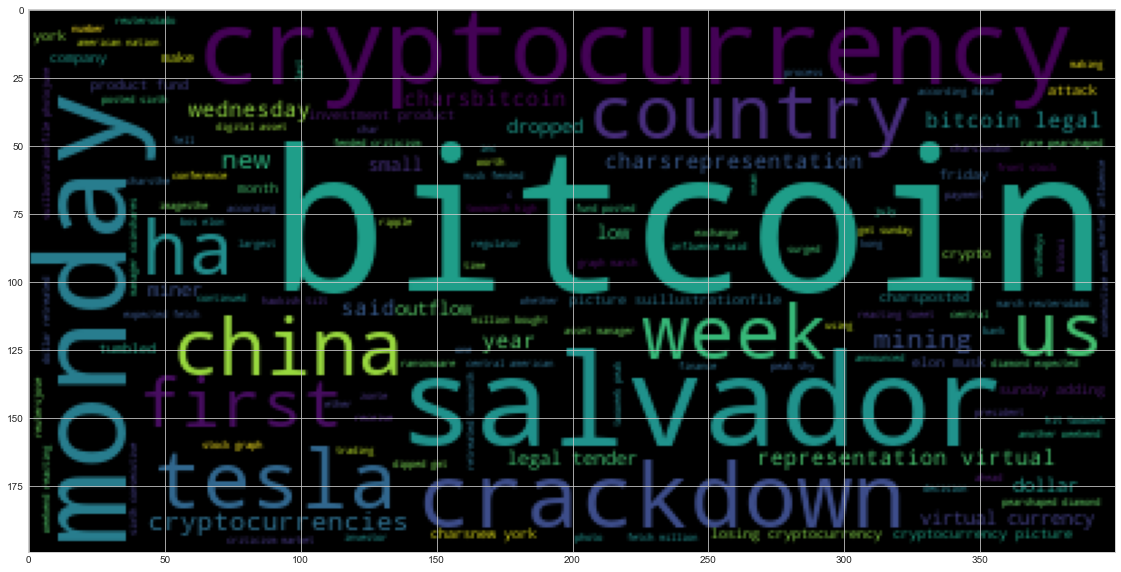

In [32]:
# Generate the Bitcoin word cloud
big_string = ' '.join(btc_tokens)
wc = WordCloud().generate(big_string)
plt.imshow(wc)

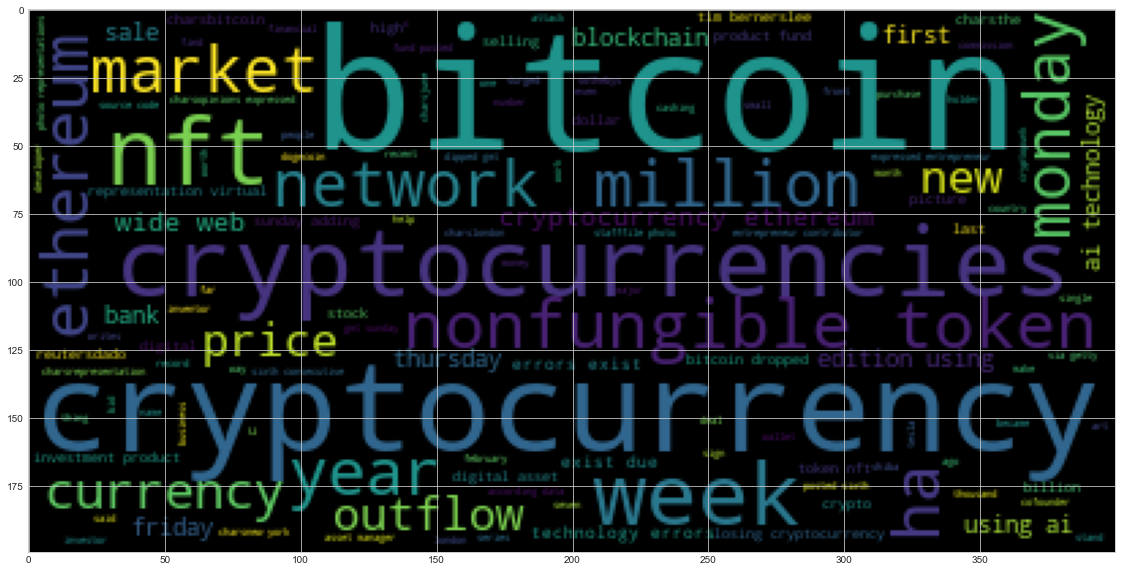

In [33]:
# Generate the Ethereum word cloud
big_string2 = ' '.join(eth_tokens)
wc_eth = WordCloud().generate(big_string2)
plt.imshow(wc_eth)

---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [34]:
import spacy
from spacy import displacy

In [35]:
# Download the language model for SpaCy
!python -m spacy download en_core_web_sm

[+] Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [36]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

---
### Bitcoin NER

In [37]:
# Concatenate all of the Bitcoin text together
btc_res

'It\'s all about clean energy, it seems.\xa0\r\nElon Musk and Tesla caused ripples in the cryptocurrency market in the past few months, first by announcing that Tesla had bought $1.5 billion worth of bitcoi… [+2508 chars]Filed under:\r\nThe supply chain attack has reached over a thousand organizations.\r\nIllustration by Alex Castro / The Verge\r\nThree days after ransomware attackers started the holiday weekend by comprom… [+3376 chars]Several crypto fans that descended on Miami, Florida, last weekend for the largest bitcoin conference in history are now saying theyve tested positive for covid-19. \r\nLarry Cermak, research director … [+2389 chars]image copyrightGetty Images\r\nThe gang behind a "colossal" ransomware attack has demanded $70m (£50.5m) paid in Bitcoin in return for a "universal decryptor" that it says will unlock the files of all … [+4140 chars]SAN SALVADOR, June 16 (Reuters) - El Salvador will not replace the U.S. dollar with bitcoin as the legal tender, Finance Minist

In [40]:
# Run the NER processor on all of the text
doc = nlp(btc_res)

# Add a title to the document
doc.user_data["title"] = "BTC NER"

In [41]:
# Render the visualization
displacy.render(doc, style='ent')

In [42]:
# List all Entities
print([ent.text for ent in doc.ents if ent.label_ == 'GPE'])

['Miami', 'Florida', 'El Salvador', 'U.S.', 'El Salvador', 'El Salvador', 'El Salvador', 'U.S.', 'Dogecoin', 'China', 'Sichuan', 'China', 'Gruenheide', 'Berlin', 'Germany', 'China', 'US', 'US', 'NEW YORK', 'IllustrationDUBAI', 'Los Angeles', 'Bitcoin', "El Salvador's", 'El Zonte', 'China', 'chars]NEW YORK', 'China', 'China', 'San Salvador', 'El Salvador', 'Yunnan province', 'chars]NEW YORK', 'Switzerland', 'El Zonte', 'El Salvador', 'China', 'New York', 'chars]NEW YORK', 'China', 'chars]WASHINGTON', 'U.S.', 'U.S.', 'Geneva', 'Switzerland', 'chars]NEW YORK', 'U.S.', 'U.S.', 'Sothebys', 'chars]NEW YORK', 'LONDON', 'China', 'China', 'Chiltiupan', 'El Salvador', 'El Salvador', 'Mexico', 'Farnham', 'Quebec', 'Canada', 'Beijing', 'chars]NEW YORK', 'SHANGHAI', 'China', 'Texas', 'HONG KONG', 'China', 'El Zonte', 'El Salvador', 'El Salvador', 'San Salvador', 'El Salvador', 'Britain', 'Keflavik', 'Iceland', 'SHANGHAI', 'El Salvador', "El Salvador'"]


---

### Ethereum NER

In [43]:
# Concatenate all of the Ethereum text together
eth_res

'TL;DR: The Cryptocurrency with Ethereum and Solidity Blockchain Developer Bundle is on sale for £21.25 as of June 17, saving you 97% on list price.\r\nIs everyone you know investing in cryptocurrency? … [+949 chars]It wasn\'t long ago that your average person had no clue what an NFT was. Nowadays, they\'re making headlines for selling for hundreds of thousands of bucks. Predictably, folks are learning about NFTs … [+3056 chars]This article was translated from our Spanish edition using AI technologies. Errors may exist due to this process.\r\nLast May, VitaliK Buterin became the youngest billionaire in the world at just 27 ye… [+2422 chars]Bitcoin and Ethereum\r\nYuriko Nakao\r\nEther overtook bitcoin in the number of active addresses on its network on Friday, a sign that demand is faltering for the world\'s biggest cryptocurrency as its co… [+2727 chars]Ether holders have "staked" more than $13 billion worth of the cryptocurrency on the ethereum 2.0 network, as excitement builds aroun

In [44]:
# Run the NER processor on all of the text
doc_eth = nlp(eth_res)

# Add a title to the document
doc_eth.user_data["title"] = "ETH NER"

In [45]:
# Render the visualization
displacy.render(doc_eth, style='ent')

In [46]:
# List all Entities
print([ent.text for ent in doc_eth.ents if ent.label_ == 'GPE'])

['Dogecoin', 'chars]NEW YORK', 'chars]NEW YORK', 'chars]NEW YORK', 'China', 'Singapore', 'UK', 'London', 'Britain', 'London', 'Sothebys', 'chars]NEW YORK', 'US', 'Shanghai', 'China', 'LONDON', 'Beijing', 'US', 'El Zonte', 'El Salvador', 'Westminster', 'Colorado', 'Westminster', 'Colorado']


---